In [1]:
from __future__ import absolute_import
from __future__ import (
    division, #  (x/y) отличается от (x//y)
    print_function,
    unicode_literals)

import tensorflow as tf_new
tf = tf_new.compat.v1
# tf.compat.v1.disable_v2_behavior()
tf.logging.set_verbosity(tf.logging.ERROR)

import numpy as np
import matplotlib.pyplot as plt

In [2]:
celsius_q       = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
# fahrenheit_a    = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)
# Зашумленные значения
fahrenheit_a    = np.array([-40, 14, 30, 48, 59, 71, 100], dtype=float)

for i,c in enumerate(celsius_q):
    print("{} *С = {} *F".format(c, fahrenheit_a[i]))

-40.0 *С = -40.0 *F
-10.0 *С = 14.0 *F
0.0 *С = 30.0 *F
8.0 *С = 48.0 *F
15.0 *С = 59.0 *F
22.0 *С = 71.0 *F
38.0 *С = 100.0 *F


In [3]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

In [4]:
model = tf.keras.models.Sequential([l0])

In [5]:
# model.compile(loss='mean_squared_error',
model.compile(loss=tf.keras.losses.mean_squared_error,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1))

In [6]:
"""
Внутри метода fit цикл вычислений, сравнений и корректировки весов
Первый аргумент - входные значения, второй аргумент - желаемые выходные значения.
ephochs - количество раз этот обучающий цикл должен быть выполнен
verbose контролирует уровень логгирования
"""

'\nВнутри метода fit цикл вычислений, сравнений и корректировки весов\nПервый аргумент - входные значения, второй аргумент - желаемые выходные значения.\nephochs - количество раз этот обучающий цикл должен быть выполнен\nverbose контролирует уровень логгирования\n'

In [7]:
fitted = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Закончена тренировка модели")

Закончена тренировка модели


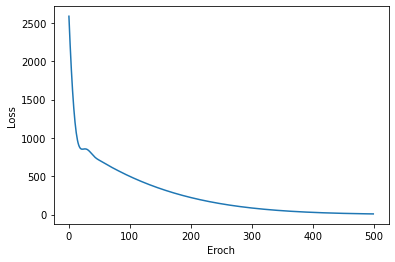

In [8]:
plt.xlabel('Eroch')
plt.ylabel('Loss')
plt.plot(fitted.history['loss'])

In [9]:
print(model.predict([100.0])) # 212 правильно

[[211.15933]]


In [10]:
print("Это значения переменных слоя: {}".format(l0.get_weights())) # 1.8 и 32 правильно

Это значения переменных слоя: [array([[1.8213818]], dtype=float32), array([29.02115], dtype=float32)]


# Эксперименты!!!

In [11]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(learning_rate=0.1))
model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Закончили обучение модели")
print("Модель предсказала, что 100 градусов Цельсия соответствуют {} градусам Фаренгейта".format(model.predict([100.0])))
print("Значения внутренних переменных слоя l0: {}".format(l0.get_weights()))
print("Значения внутренних переменных слоя l1: {}".format(l1.get_weights()))
print("Значения внутренних переменных слоя l2: {}".format(l2.get_weights()))

Закончили обучение модели
Модель предсказала, что 100 градусов Цельсия соответствуют [[211.57199]] градусам Фаренгейта
Значения внутренних переменных слоя l0: [array([[-0.9308937 , -0.319364  ,  0.66846013,  0.12338687]],
      dtype=float32), array([-3.536098 ,  3.2948062,  3.6548054, -2.0362124], dtype=float32)]
Значения внутренних переменных слоя l1: [array([[ 0.12833567,  1.1746342 , -0.19311677, -0.44995835],
       [ 0.05384976, -1.649413  ,  1.4535172 , -0.05634498],
       [-0.17889112, -1.1933497 ,  0.83747727, -0.20588104],
       [-0.0214994 ,  0.5046737 ,  0.05103582,  0.6233846 ]],
      dtype=float32), array([ 2.1926086, -3.5278375,  3.6112516,  2.3075798], dtype=float32)]
Значения внутренних переменных слоя l2: [array([[-0.05010744],
       [-1.2150022 ],
       [ 0.47087976],
       [ 0.18582621]], dtype=float32), array([3.409356], dtype=float32)]
